In [3]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv('/Users/paigegiese/SYG/landproDATA_code/misc-work/.env')

username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")

# Create SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/landprodata")
query = "SELECT * FROM entities"
df = pd.read_sql(query, con=engine)
df.head()

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,Zip Code,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
2,3,Firm,Developer,RE - Development,A Team Land Consultants LLC,A TEAM LAND CONSULTANTS LLC,1,W101200,312892,LLC,...,83709,2011-03-07,,None,1,None,"EXISTING, ANREPT SENT 08 Jan 2014",,Barbara Broussard,2014-10-07
3,4,Firm,Surveyor,Survey,"Accurate Surveying & Mapping, P.C.","ACCURATE SURVEYING & MAPPING, P.C.",1,C163074,494817,Corp,...,83703,2005-10-24,,None,1,None,"GOODSTANDING, ANREPT SENT 11 Aug 2014",None,Barbara Broussard,2014-10-07
4,5,Agency,Public Agency,,Ada County Highway District,,0,,,Public Agency,...,,1969-12-31,,,2,,,,Barbara Broussard,2014-10-07


In [ ]:
def is_na(x):
    try:
        if (pd.isna(x)) or x.strip() =='':
            return 1
        else:
            return 0
    except: 
        pass


In [21]:
df['Is Name Confirmed by LPD'].isna().value_counts()

Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64

In [31]:
df['Is Name Confirmed by LPD'].isna().value_counts()#.apply(is_na)

Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64

In [ ]:
df['IDSOS Filing Number'].value_counts()[0]

IDSOS Filing Number
           2288
390032        2
378050        2
9819          2
D161808       1
C126748       1
W10563        1
D167996       1
C131568       1
W166622       1
C207913       1
C210006       1
W21094        1
W157549       1
W145462       1
W165735       1
C182582       1
L2975         1
W65725        1
D105711       1
C168352       1
D70486        1
D183594       1
D145517       1
W20770        1
W129117       1
C197860       1
D52188        1
D1338         1
C163794       1
Name: count, dtype: int64

In [43]:
df.shape

(13394, 27)

In [79]:
for c in df.columns.tolist():
    if (df[c].dtype == int) | (df[c].dtype==float):
        print(f'{c} nulls: {df[c].isna().value_counts()} || unique values: {df[c].nunique()}')
        print(' ')
    else:
        try:
            print(f'{c} nulls: {df[c].apply(is_na).mean()} || unique values: {df[c].nunique()} || count: {df[c].apply(is_na).sum()}')
            print(' ')
        except: 
            print(c)

ID nulls: ID
False    13394
Name: count, dtype: int64 || unique values: 13394
 
Entity Group ID nulls: 0.06256532775869793 || unique values: 8 || count: 838
 
Entity Subgroup ID nulls: 0.1745557712408541 || unique values: 152 || count: 2338
 
Entity Category nulls: 0.7536956846349111 || unique values: 105 || count: 10095
 
Name nulls: 7.466029565477079e-05 || unique values: 13394 || count: 1
 
IDSOS Name nulls: 0.09967149469911901 || unique values: 12032 || count: 1335
 
Is Name Confirmed by LPD nulls: Is Name Confirmed by LPD
False    13394
Name: count, dtype: int64 || unique values: 4
 
IDSOS Filing Number nulls: 0.286322233836046 || unique values: 9557 || count: 3835
 
IDSOS Control ID nulls: 0.11213976407346574 || unique values: 11853 || count: 1502
 
Type nulls: 0.10728684485590563 || unique values: 63 || count: 1437
 
Alias nulls: 0.9805136628341048 || unique values: 158 || count: 13133
 
Parent nulls: 0.986337165895177 || unique values: 179 || count: 13211
 
Contact Name nulls: 

In [52]:
df.loc[df['Entity Category'].apply(is_na)]

,ID,Entity Group ID,Entity Subgroup ID,Entity Category,Name,IDSOS Name,Is Name Confirmed by LPD,IDSOS Filing Number,IDSOS Control ID,Type,...,Zip Code,IDSOS Filing Date,Industry Types,Company Size,Status,URL,Source Comments,landproDATA Comments,Entered By,Entered Time
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
0,1,Firm,Surveyor,Survey,2 Bar K Land Surveying,2 Bar K Land Surveying,0,,,,...,,1969-12-31,,,1,,,no IDSOS filing number,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07
1,2,Firm,Surveyor,Survey,4 Rivers Surveying Inc.,4 RIVERS SURVEYING INC.,1,C184933,558923,Corp,...,83617,2009-10-27,,None,99,https://www.4rivers-surveying.com/,"GOODSTANDING, ANREPT SENT 11 Aug 2014",full-service land surveying company specializ...,Barbara Broussard,2014-10-07


Text(0.5, 1.0, 'Entered Year')

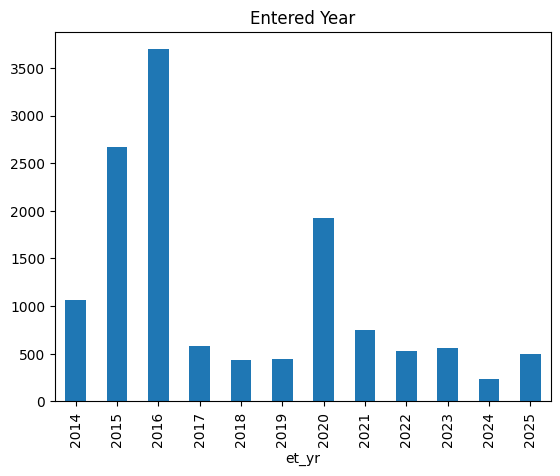

In [80]:
import matplotlib.pyplot as plt
df['et_yr'] = df['Entered Time'].dt.year
df.sort_values(by='et_yr').groupby('et_yr')['ID'].count().plot.bar()

plt.title('Entered Year')

In [64]:
df.columns

Index(['ID', 'Entity Group ID', 'Entity Subgroup ID', 'Entity Category',
       'Name', 'IDSOS Name', 'Is Name Confirmed by LPD', 'IDSOS Filing Number',
       'IDSOS Control ID', 'Type', 'Alias', 'Parent', 'Contact Name',
       'Contact Title', 'Address', 'City', 'State', 'Zip Code',
       'IDSOS Filing Date', 'Industry Types', 'Company Size', 'Status', 'URL',
       'Source Comments', 'landproDATA Comments', 'Entered By', 'Entered Time',
       'et_yr'],
      dtype='object')

In [75]:
cats = df[['ID','Entity Group ID', 'Entity Subgroup ID', 'Entity Category']].replace('', None)

cat_groups = cats.iloc[:,1:].value_counts().reset_index()

In [78]:
cat_groups.shape

(396, 4)